In [1]:
# Import, read, and split data
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv')

X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
#estimator = LogisticRegression()

### Decision Tree
estimator = GradientBoostingClassifier()

### Support Vector Machine
#estimator = SVC(kernel='rbf', gamma=1000)

In [2]:
y.shape

(100,)

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

# cv is the number of folds. 'cv'-Fold Cross-Validation. returns a list of 'cv' values
# One way of setting it: 
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:1310: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 73 instead of 100).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


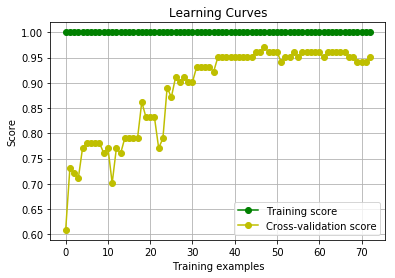

In [4]:
draw_learning_curves(X2,y2, estimator, 100)